In [ ]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 32.0 MB/s 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from pylab import rcParams3
#import xlsxwriter
import warnings
warnings.filterwarnings('ignore')
#rcParams["figure.figsize"]=30,16

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_excel("/content/drive/MyDrive/subsequent_funded_v2.xlsx")
df.head(2)

,OpportunityID,OpportunityName,Renewal_OpportunityID,Renewal_PreviousCollectionStatus,Renewal_PreviousOpportunityID,Renewal_PreviousCreatedDate,Renewal_PreviousRenewals_Manager,Renewal_PreviouszzStatus,Renewal_PreviousPace,Renewal_PreviousDaysSinceLastPayment,...,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,AvgMonthRevenue,AvgDailyBalance,NewDeal_YN,ActiveDeal_YN,WriteOff_YN,FundedWriteOffAmount_Gross,FundedWriteOffAmount_Net
0,0062M00000bmHA5QAM,Hafteh Bazaar Magazine-Renewal Deal-12192018,0062M00000bmHA5QAM,Default,0064100000b8jUhAAI,2018-11-06 19:57:54,Monique Williams,Renewed - PIF,100.0,0.0,...,223.08,NaN,40,1873.33,432.67,0.0,0.0,0.0,NaN,NaN
1,0062M00000bmhkAQAQ,Triple J Enterprises-Renewal Deal-12312018,0062M00000bmhkAQAQ,Other,0064100000b8R6zAAE,2018-11-05 14:22:56,Syed Salman,Renewed - PIF,100.0,0.0,...,56.37,38.0,18,11316.67,1060.00,0.0,0.0,1.0,2416.0,2416.0


In [ ]:
print("No. of features:", len(df.columns))
print("No. of rows:", len(df[:]))

No. of features: 39
No. of rows: 2895


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   OpportunityID                         2895 non-null   object        
 1   OpportunityName                       2895 non-null   object        
 2   Renewal_OpportunityID                 2895 non-null   object        
 3   Renewal_PreviousCollectionStatus      2895 non-null   object        
 4   Renewal_PreviousOpportunityID         2895 non-null   object        
 5   Renewal_PreviousCreatedDate           2895 non-null   datetime64[ns]
 6   Renewal_PreviousRenewals_Manager      2753 non-null   object        
 7   Renewal_PreviouszzStatus              2895 non-null   object        
 8   Renewal_PreviousPace                  2883 non-null   float64       
 9   Renewal_PreviousDaysSinceLastPayment  2890 non-null   float64       
 10  

In [ ]:
numerical_attributes = df.columns[df.dtypes!="object"]
categorical_attributes = df.columns[df.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 31 

Index(['Renewal_PreviousCreatedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousDaysSinceLastPayment',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'BankStatement_Sum_NumReturnItems',
       'LastBankStatement_OverdraftDays', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'HBwoLCF', 'Contract_HoldBack__c', 'AvgMonthRevenue', 'AvgDailyBalance',
       'NewDeal_YN', 'ActiveDeal_YN', 'WriteOff_YN',
       'FundedWriteOffAmount_Gross', 'FundedWriteOffAmount_Net'],
      dtype='object')


Categorical_att

#Checking individual correlation of all features w.r.t WriteOff_YN

In [ ]:
#Credit score has a very small negative correlation with WriteOff_YN. It should have a highly negative correlation. 
#Most of the features are negatively correlated.
# This is generally not a good sign as attributes seem to have very poor predictive powers individually.
#In general they should be at least some positive correlation of these features wrt WriteOff_YN 

# Conclusion:-
#   Either the write off decisions were made based on other criteria that are not captured by these attributes or there is some problem in the data itself.
df.corr()['WriteOff_YN']

Renewal_PreviousPace                   -0.000138
Renewal_PreviousDaysSinceLastPayment   -0.011728
Renewal_PreviousPaidPercentageOfRTR    -0.076531
Renewal_PreviousCreditScore            -0.061464
Renewal_CountPreviousDeals             -0.095274
Renewal_PreviousCountBounces            0.031445
Renewal_PreviousPosition                0.012538
Renewal_PreviousHBwLCF                 -0.015684
Renewal_PreviousHBwoLCF                 0.002099
Renewal_PreviousAvgMonthRevenue         0.009876
Renewal_PreviousAvgDailyBalance        -0.013707
Renewal_TwoWeekBounces                  0.055832
NumberOfBankStatements                 -0.038567
BankStatement_MA_OverdraftDays          0.041639
BankStatement_MA_NumReturnItems        -0.000746
BankStatement_Sum_NumReturnItems       -0.005490
LastBankStatement_OverdraftDays         0.040946
Credit_Score__c                        -0.064660
Time_in_Business__c                    -0.102934
BBC_Position__c                         0.022632
HB_with_LCF_Payment_

# Negative values of time in business

In [ ]:
# Why these values are negative?
# These rows should be dropped
df[df['Time_in_Business__c']<0]['Time_in_Business__c']

21     -0.12
93     -0.85
126    -1.07
217    -0.91
380    -0.08
383    -0.72
531    -0.06
724    -0.65
1034   -0.37
1440   -0.24
Name: Time_in_Business__c, dtype: float64

In [ ]:
df[df['Time_in_Business__c']<0].to_excel('/content/drive/MyDrive/15_June/negative_time_in_business.xlsx', sheet_name='sheet1', index=False)

# Dropped unnecessary Categoricals and Numerical features


In [ ]:
print('Original Shape before dropping features :',df.shape)

Original Shape before dropping features : (2895, 39)


In [ ]:
# Dropped unnecessary categoricals features
df =  df.drop(['OpportunityID',
               'OpportunityName', 
                'Renewal_OpportunityID', 
                'Renewal_PreviousOpportunityID',
                'Renewal_PreviousCollectionStatus',
                'Renewal_PreviousRenewals_Manager',
                'Renewal_PreviouszzStatus'], axis=1)

In [ ]:
print('Original Shape after dropping features :',df.shape)

Original Shape after dropping features : (2895, 32)


# Checking  missing values in categorical feature

In [ ]:
df['Is_this_Business_home_based__c'].isnull().sum()

1

In [ ]:
df[df['Is_this_Business_home_based__c'].isnull()]

,Renewal_PreviousCreatedDate,Renewal_PreviousPace,Renewal_PreviousDaysSinceLastPayment,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,...,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,AvgMonthRevenue,AvgDailyBalance,NewDeal_YN,ActiveDeal_YN,WriteOff_YN,FundedWriteOffAmount_Gross,FundedWriteOffAmount_Net
928,2018-09-11 20:07:15,100.0,0.0,NaN,585.0,1,0,1.0,0.0,NaN,...,15.18,NaN,15,10931.44,1353.68,0.0,0.0,0.0,NaN,NaN


In [ ]:
df['Is_this_Business_home_based__c'].value_counts()

No     1630
Yes    1264
Name: Is_this_Business_home_based__c, dtype: int64

In [ ]:
df['Is_this_Business_home_based__c'].mode()

0    No
dtype: object

In [ ]:
df['Is_this_Business_home_based__c'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df['Is_this_Business_home_based__c'] = df['Is_this_Business_home_based__c'].map(lambda x: 1 if x=='Yes' else 0)

In [ ]:
df['Is_this_Business_home_based__c'].unique()

array([0, 1])

In [ ]:
df['Is_this_Business_home_based__c'].isnull().sum()

0

# Need to handle missing values in target variable
* We have just 2 missing values in target variable so we can drop these tuples.

In [ ]:
df['WriteOff_YN'].isnull().sum()

2

In [ ]:
df[df['WriteOff_YN'].isnull()]['WriteOff_YN']

1710   NaN
2766   NaN
Name: WriteOff_YN, dtype: float64

In [ ]:
df_null_write_off_dull = df[df['WriteOff_YN'].isnull()]

In [ ]:
df.drop(index=[1710, 2766], inplace = True)

In [ ]:
df['WriteOff_YN'].isnull().sum()

0

In [ ]:
print('The updated shape of the dataframe :',df.shape)

The updated shape of the dataframe : (2893, 32)


In [ ]:
df_null_write_off_dull

,Renewal_PreviousCreatedDate,Renewal_PreviousPace,Renewal_PreviousDaysSinceLastPayment,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,...,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,AvgMonthRevenue,AvgDailyBalance,NewDeal_YN,ActiveDeal_YN,WriteOff_YN,FundedWriteOffAmount_Gross,FundedWriteOffAmount_Net
1710,2020-09-01 16:17:20,100.0,0.0,1.0,617.0,1,0,4.0,0.00,65.0,...,88.60,12.0,40,34042.67,4321.39,NaN,NaN,NaN,NaN,NaN
2766,2021-08-16 19:56:27,100.0,0.0,0.6,668.0,1,0,3.0,71.88,46.0,...,23.82,NaN,24,21019.72,2498.69,NaN,NaN,NaN,NaN,NaN


## Checking_duplicacy_of_data


In [ ]:
print(df.duplicated().sum())

0


## Checking_missing_values_for_each_numerical_attributes

In [6]:
# Function will plot the distributions of a given feature
def plot_distribution(df_feature):
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,1)
  sns.distplot(df_feature)
  plt.subplot(2,2,2)
  sns.boxplot(df_feature)
  plt.show()

In [ ]:
numerical_attributes = df.columns[df.dtypes!="object"]
categorical_attributes = df.columns[df.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 32 

Index(['Renewal_PreviousCreatedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousDaysSinceLastPayment',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'BankStatement_Sum_NumReturnItems',
       'LastBankStatement_OverdraftDays', 'Credit_Score__c',
       'Time_in_Business__c', 'Is_this_Business_home_based__c',
       'BBC_Position__c', 'HB_with_LCF_Payment__c', 'HBwoLCF',
       'Contract_HoldBack__c', 'AvgMonthRevenue', 'AvgDailyBalance',
       'NewDeal_YN', 'ActiveDeal_YN', 'WriteOff_YN',
       'FundedWriteOffAmount_Gross', 'FundedWriteOffAmount_Net']

In [ ]:
# Number of missing values
df[numerical_attributes].isnull().sum().sort_values(ascending=False)

FundedWriteOffAmount_Net                2145
FundedWriteOffAmount_Gross              2145
HBwoLCF                                 1483
Renewal_PreviousHBwoLCF                 1123
LastBankStatement_OverdraftDays          769
Renewal_PreviousAvgMonthRevenue          533
Renewal_PreviousPaidPercentageOfRTR      394
AvgMonthRevenue                          341
Renewal_PreviousAvgDailyBalance          292
AvgDailyBalance                          248
BankStatement_MA_OverdraftDays            28
BankStatement_MA_NumReturnItems           28
BankStatement_Sum_NumReturnItems          28
Renewal_PreviousCreditScore               27
Credit_Score__c                           18
Renewal_PreviousPace                      12
Renewal_PreviousPosition                   7
Renewal_PreviousDaysSinceLastPayment       5
Time_in_Business__c                        1
NumberOfBankStatements                     0
Renewal_CountPreviousDeals                 0
WriteOff_YN                                0
ActiveDeal

In [ ]:
# In Percentages %
df[numerical_attributes].isnull().sum().sort_values(ascending=False)/len(df)*100 

FundedWriteOffAmount_Net                74.144487
FundedWriteOffAmount_Gross              74.144487
HBwoLCF                                 51.261666
Renewal_PreviousHBwoLCF                 38.817836
LastBankStatement_OverdraftDays         26.581403
Renewal_PreviousAvgMonthRevenue         18.423782
Renewal_PreviousPaidPercentageOfRTR     13.619081
AvgMonthRevenue                         11.787072
Renewal_PreviousAvgDailyBalance         10.093329
AvgDailyBalance                          8.572416
BankStatement_MA_OverdraftDays           0.967853
BankStatement_MA_NumReturnItems          0.967853
BankStatement_Sum_NumReturnItems         0.967853
Renewal_PreviousCreditScore              0.933287
Credit_Score__c                          0.622191
Renewal_PreviousPace                     0.414794
Renewal_PreviousPosition                 0.241963
Renewal_PreviousDaysSinceLastPayment     0.172831
Time_in_Business__c                      0.034566
NumberOfBankStatements                   0.000000


In [ ]:
df_NewDeal_YN = df[df['NewDeal_YN'] == 0]

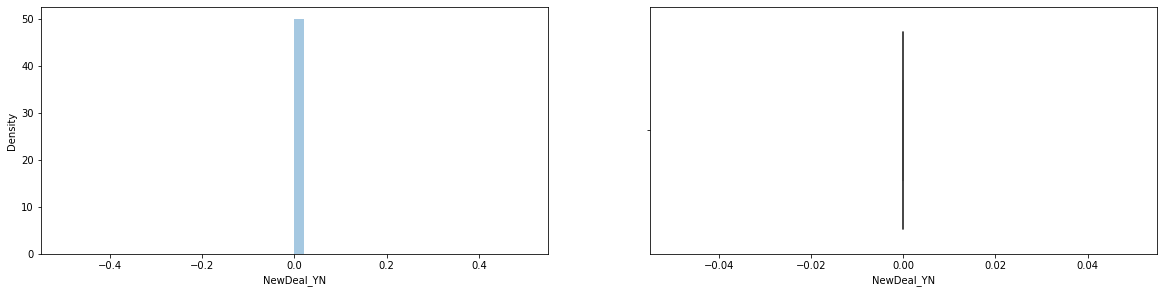

In [ ]:
plot_distribution(df['NewDeal_YN'])

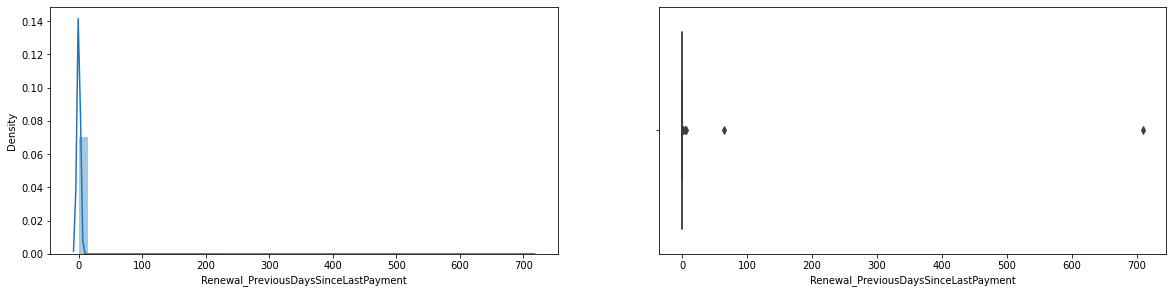

In [ ]:
plot_distribution(df['Renewal_PreviousDaysSinceLastPayment'])


In [ ]:
df["ActiveDeal_YN"].unique()

array([0., 1.])

In [ ]:
df["ActiveDeal_YN"].value_counts()

0.0    2831
1.0      62
Name: ActiveDeal_YN, dtype: int64

In [ ]:
df_ActiveDeal_YN = df[df['ActiveDeal_YN'] == 1]

In [ ]:
df_ActiveDeal_YN.head(2)

,Renewal_PreviousCreatedDate,Renewal_PreviousPace,Renewal_PreviousDaysSinceLastPayment,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,...,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,AvgMonthRevenue,AvgDailyBalance,NewDeal_YN,ActiveDeal_YN,WriteOff_YN,FundedWriteOffAmount_Gross,FundedWriteOffAmount_Net
1216,2020-09-29 21:14:58,100.0,0.0,0.63,0.0,1,0,1.0,13.74,0.0,...,15.61,0.0,16,86938.50,10332.85,0.0,1.0,0.0,NaN,NaN
1290,2020-11-19 14:10:14,100.0,0.0,0.26,644.0,3,15,2.0,22.12,12.0,...,19.46,0.0,19,321637.34,26224.93,0.0,1.0,0.0,NaN,NaN


### Dropping numerical_values 


In [ ]:

df = df.drop(["FundedWriteOffAmount_Net", 
              "FundedWriteOffAmount_Gross",
              "NewDeal_YN", 
              "Renewal_PreviousDaysSinceLastPayment",
              "Renewal_PreviousCreatedDate",
              "ActiveDeal_YN"], axis = 1)

In [ ]:
df.shape

(2893, 26)

In [ ]:
df.to_excel('/content/drive/MyDrive/15_June/subsequent_feature_v2.xlsx', index=False)

#---------Done till this point ------------

### Analyses on Credit_Score__c 
##### Missing values = 0.62219 (27)

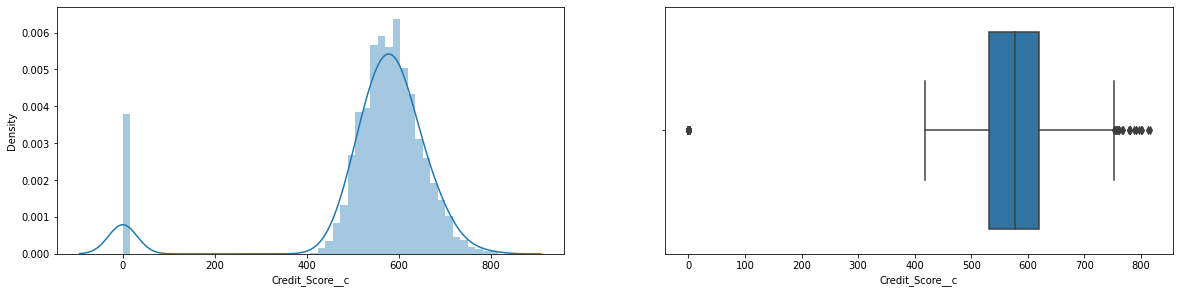

In [ ]:
plot_distribution(df['Credit_Score__c'])

In [ ]:
df_Credit_Score = df[(df['Credit_Score__c'] == 1) | (df['Credit_Score__c'] == 0)]

In [ ]:
len(df[(df['Credit_Score__c'] == 1) | (df['Credit_Score__c'] == 0)])

178

In [ ]:
df["Credit_Score__c"].describe()

count    2875.000000
mean      548.857043
std       153.331880
min         0.000000
25%       532.000000
50%       577.000000
75%       620.000000
max       815.000000
Name: Credit_Score__c, dtype: float64

In [ ]:
df["Credit_Score__c"].median()

577.0

In [ ]:
df["Credit_Score__c"].unique()

array([533., 537.,   0., 524., 636., 647., 615., 528., 619., 531., 467.,
       614., 522., 610., 640., 671., 539., 526., 572., 543., 558., 483.,
       699., 620., 562., 686., 565., 545., 484., 546., 541., 504., 586.,
       457., 621., 493., 659., 673., 563., 527., 623., 739., 485., 684.,
       465., 535., 600., 552., 668., 500., 595., 476., 525., 518., 463.,
       491., 440., 576., 508., 629., 515., 523., 464., 630., 654., 746.,
       538., 438., 554., 472., 570., 639., 611., 644., 646., 613., 607.,
       688., 652., 497., 612., 516., 582., 509., 556., 481., 721., 557.,
       540., 506., 542., 692., 648., 503., 436., 585., 569., 469., 536.,
       660., 561., 703., 574., 674., 683., 626., 664., 624., 495., 578.,
       577., 553., 601., 560., 665., 488., 583., 682., 618., 743., 550.,
       514., 494., 594., 599., 581., 689., 575., 604., 598., 657., 564.,
       713., 520., 608., 778., 740., 507., 690., 567., 534., 617., 475.,
       662., 650., 455., 492., 549., 473., 517., 45

In [ ]:
df['Renewal_PreviousCreditScore'].value_counts()

0.0      170
595.0     30
578.0     29
587.0     25
560.0     25
        ... 
788.0      1
472.0      1
757.0      1
451.0      1
446.0      1
Name: Renewal_PreviousCreditScore, Length: 314, dtype: int64

In [ ]:
df['Renewal_PreviousCreditScore'].unique()

array([534., 537.,   0., 524., 636., 647., 615., 528., 619., 531., 467.,
       614., 522., 610., 640., 671., 539.,  nan, 622., 558., 483., 699.,
       620., 564., 545., 484., 546., 535., 504., 586., 496., 497., 598.,
       673., 731., 631., 503., 623., 739., 485., 684., 465., 587., 563.,
       612., 589., 606., 668., 500., 595., 476., 518., 463., 440., 567.,
       508., 629., 536., 515., 600., 464., 630., 654., 755., 499., 438.,
       554., 576., 639., 644., 646., 613., 607., 611., 526., 688., 491.,
       652., 516., 659., 509., 562., 572., 556., 481., 721., 557., 540.,
       565., 559., 692., 648., 525., 621., 533., 469., 660., 561., 703.,
       521., 674., 742., 529., 626., 624., 560., 523., 547., 543., 544.,
       603., 655., 488., 552., 682., 712., 743., 455., 514., 594., 457.,
       689., 495., 604., 642., 542., 713., 570., 472., 505., 701., 740.,
       577., 507., 638., 617., 575., 662., 650., 436., 548., 451., 634.,
       653., 494., 658., 475., 549., 599., 517., 45

In [ ]:
len(df[(df['Renewal_PreviousCreditScore'] == 1) | (df['Renewal_PreviousCreditScore'] == 0)])

182

In [ ]:
df_Renewal_PreviousCreditScore = df[(df['Renewal_PreviousCreditScore'] == 1) | (df['Renewal_PreviousCreditScore'] == 0)]

In [ ]:
with pd.ExcelWriter('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/analyses_of_features_1.xlsx', engine='xlsxwriter') as writer:
    df_null_write_off_dull.to_excel(writer, sheet_name='write_off')
    df_NewDeal_YN.to_excel(writer, sheet_name='New_Deal_YN')
    df_ActiveDeal_YN.to_excel(writer, sheet_name='Active_YN')
    df_Credit_Score.to_excel(writer, sheet_name='Credit_Score_C')
    df_Renewal_PreviousCreditScore.to_excel(writer, sheet_name='Renewal_Previous_Cridit_Score_c')

In [ ]:
df.shape

(2893, 27)

In [ ]:
df = df.drop('OpportunityID', axis = 1)

In [ ]:
df.shape

(2893, 26)

# Data distribution graph for some specific features having missing values

In [ ]:
# LastBankStatement_OverdraftDays
# Renewal_PreviousAvgMonthRevenue
# AvgMonthRevenue
# Renewal_PreviousAvgDailyBalance
# AvgDailyBalance
# BankStatement_MA_NumReturnItems
# BankStatement_MA_OverdraftDays
# BankStatement_Sum_NumReturnItems
# Renewal_PreviousCreditScore
# Credit_Score__c
# Renewal_PreviousPace
# Renewal_PreviousPosition
# Renewal_PreviousDaysSinceLastPayment                ## Deleted
# Time_in_Business__c

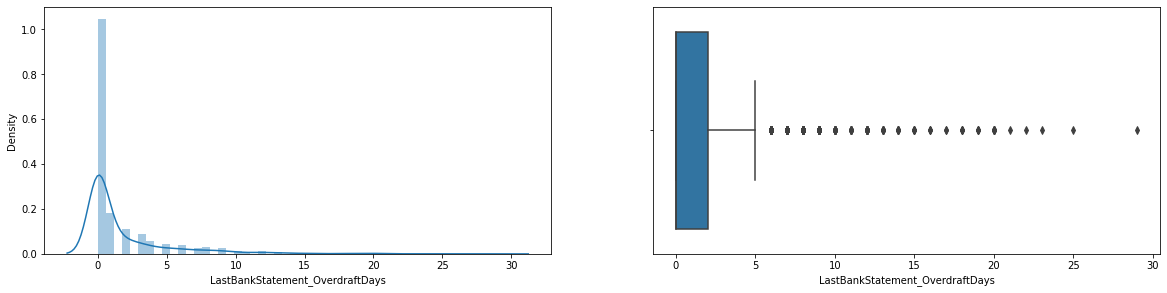

In [ ]:
# LastBankStatement_OverdraftDays
plot_distribution(df['LastBankStatement_OverdraftDays'])   

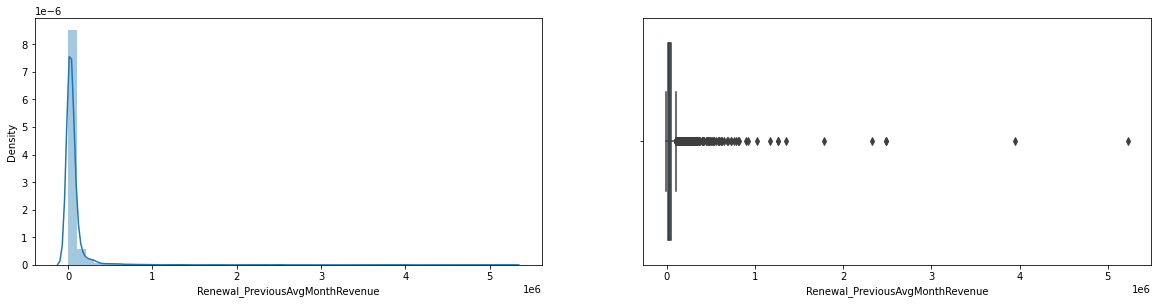

In [ ]:
# Renewal_PreviousAvgMonthRevenue
plot_distribution(df['Renewal_PreviousAvgMonthRevenue'])

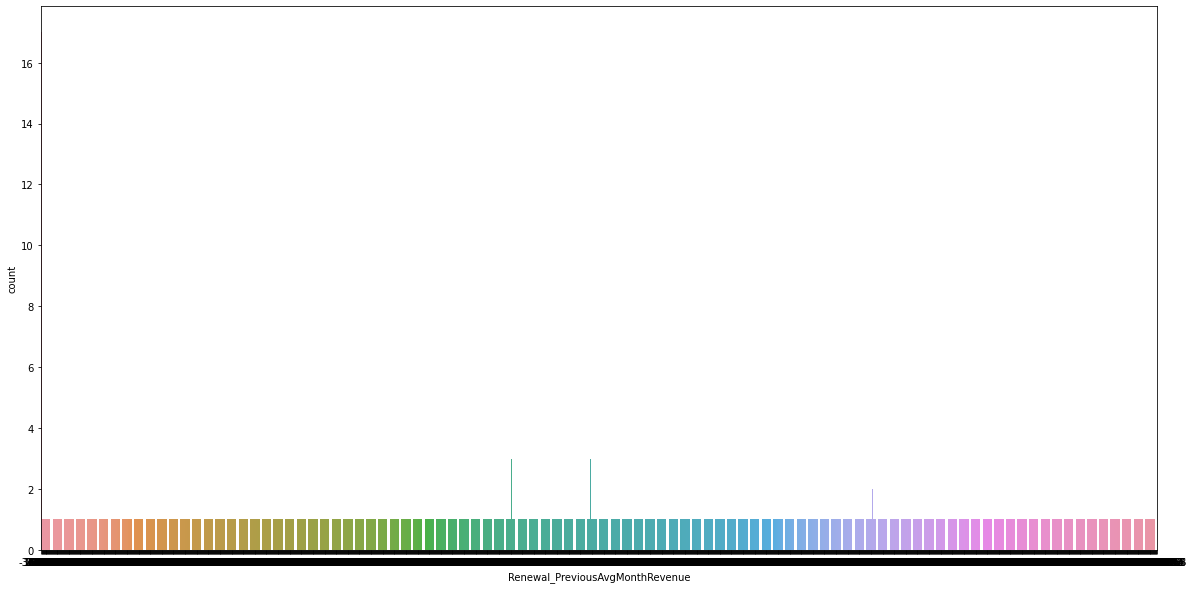

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(df['Renewal_PreviousAvgMonthRevenue'])

In [ ]:
df['Renewal_PreviousAvgMonthRevenue'].value_counts()

0.00         17
23838.18      3
20164.09      3
41739.10      2
17772.00      2
             ..
20085.76      1
8520.33       1
32000.75      1
62347.46      1
106231.97     1
Name: Renewal_PreviousAvgMonthRevenue, Length: 2328, dtype: int64

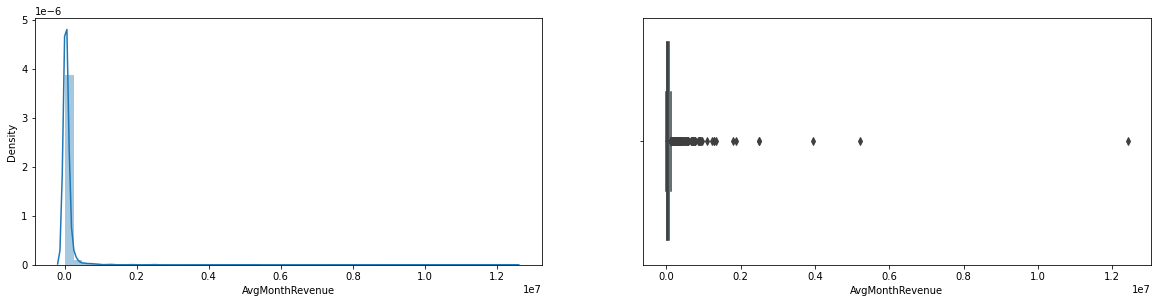

In [ ]:
# AvgMonthRevenue
plot_distribution(df['AvgMonthRevenue'])

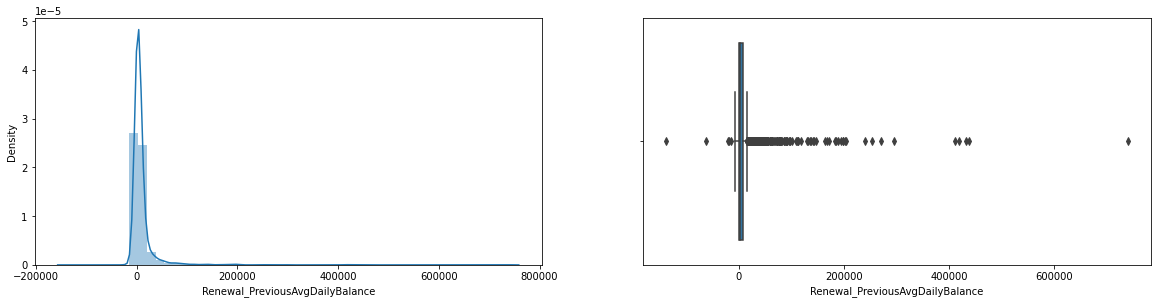

In [ ]:
# Renewal_PreviousAvgDailyBalance
plot_distribution(df['Renewal_PreviousAvgDailyBalance'])

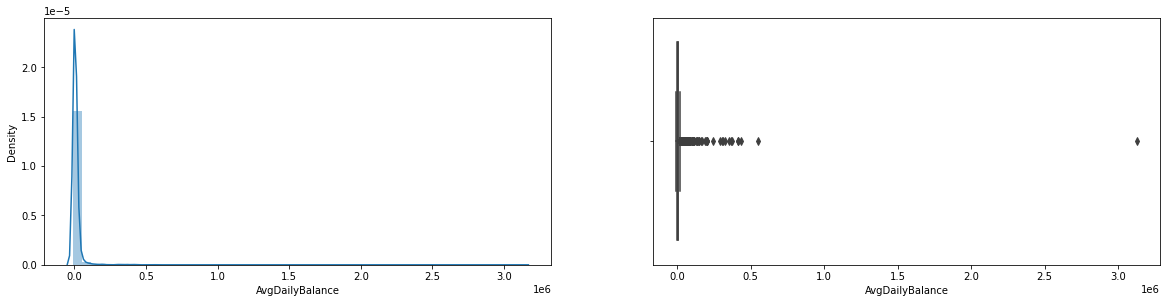

In [ ]:
# AvgDailyBalance
plot_distribution(df['AvgDailyBalance'])

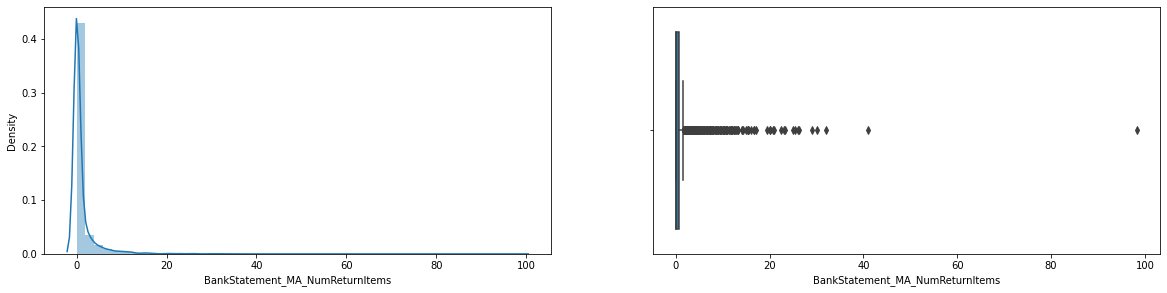

In [ ]:
# BankStatement_MA_NumReturnItems
plot_distribution(df['BankStatement_MA_NumReturnItems'])

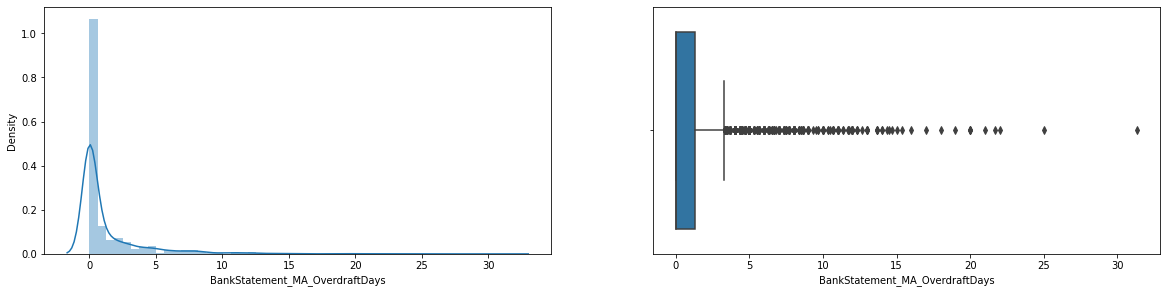

In [ ]:
# BankStatement_MA_OverdraftDays
plot_distribution(df['BankStatement_MA_OverdraftDays'])

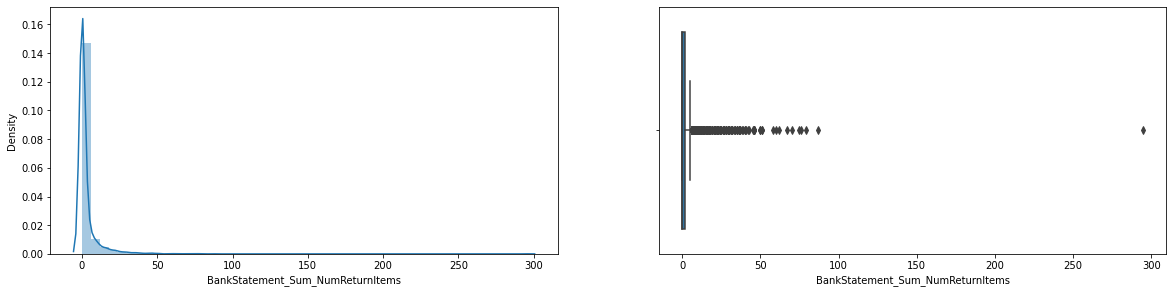

In [ ]:
# BankStatement_Sum_NumReturnItems
plot_distribution(df['BankStatement_Sum_NumReturnItems'])

In [ ]:
df['BankStatem_Sum_NumReturnItements'].value_counts()

0.0      1952
1.0       194
2.0       121
3.0        90
4.0        76
5.0        54
6.0        43
8.0        32
10.0       32
7.0        28
9.0        28
12.0       18
16.0       18
11.0       15
14.0       13
13.0       12
22.0       11
17.0       11
18.0       11
24.0       10
15.0        9
21.0        8
20.0        7
46.0        6
30.0        5
27.0        5
28.0        5
36.0        4
19.0        4
23.0        3
32.0        3
35.0        3
29.0        3
34.0        2
50.0        2
40.0        2
31.0        2
37.0        2
26.0        2
25.0        2
51.0        2
33.0        1
43.0        1
76.0        1
42.0        1
60.0        1
79.0        1
41.0        1
70.0        1
295.0       1
45.0        1
38.0        1
75.0        1
39.0        1
87.0        1
67.0        1
62.0        1
58.0        1
Name: BankStatement_Sum_NumReturnItems, dtype: int64

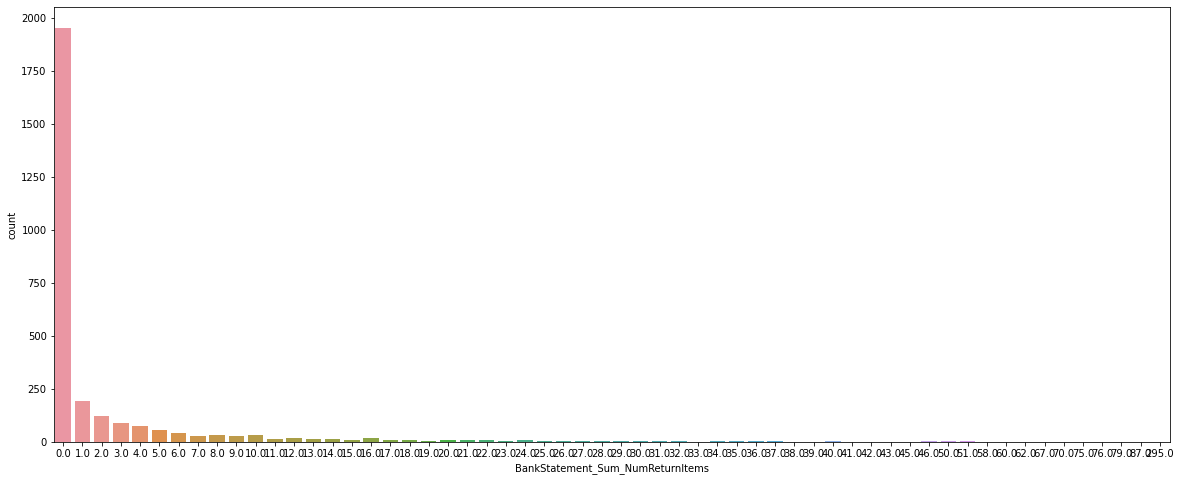

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(df['BankStatement_Sum_NumReturnItems'])


In [ ]:
df['BankStatement_Sum_NumReturnItems']

0        4.0
1        0.0
2        NaN
3        0.0
4        0.0
        ... 
2890     0.0
2891    58.0
2892     0.0
2893     0.0
2894    16.0
Name: BankStatement_Sum_NumReturnItems, Length: 2895, dtype: float64

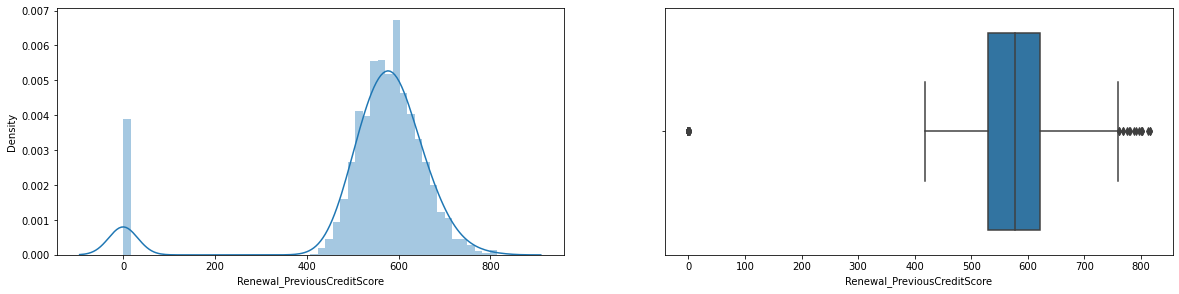

In [ ]:
# Renewal_PreviousCreditScore
plot_distribution(df['Renewal_PreviousCreditScore'])

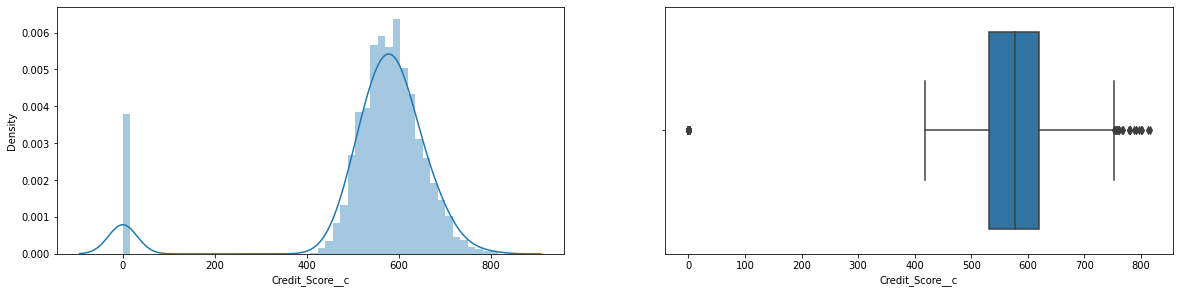

In [ ]:
# Credit_Score__c
plot_distribution(df['Credit_Score__c'])

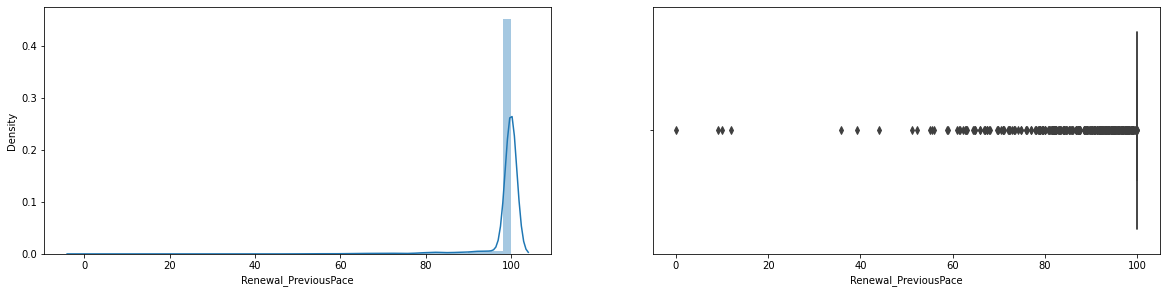

In [ ]:
# Renewal_PreviousPace
plot_distribution(df['Renewal_PreviousPace'])

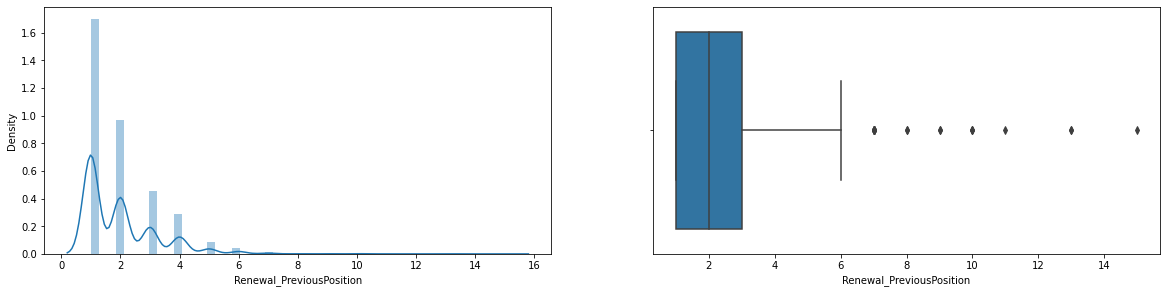

In [ ]:
# Renewal_PreviousPosition
plot_distribution(df['Renewal_PreviousPosition'])

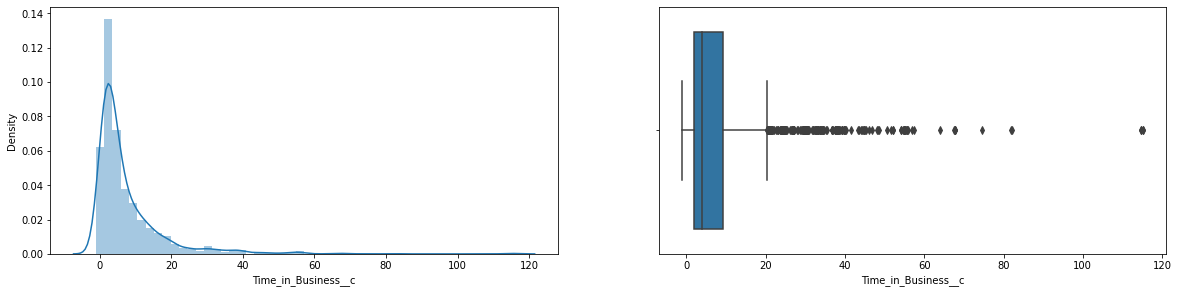

In [ ]:
# Time_in_Business__c
plot_distribution(df['Time_in_Business__c'])

In [ ]:
df.head()

,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,...,Credit_Score__c,Time_in_Business__c,Is_this_Business_home_based__c,BBC_Position__c,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,AvgMonthRevenue,AvgDailyBalance,WriteOff_YN
0,100.0,0.75,534.0,1,4,1.0,0.0,NaN,NaN,3320.50,...,533.0,18.51,0,1,223.08,NaN,40,1873.33,432.67,0.0
1,100.0,0.55,537.0,1,0,2.0,0.0,NaN,NaN,1008.71,...,537.0,1.16,0,2,56.37,38.0,18,11316.67,1060.00,1.0
2,100.0,0.69,0.0,2,0,2.0,0.0,NaN,NaN,12989.58,...,0.0,9.22,0,1,0.00,NaN,12,NaN,9879.37,1.0
3,100.0,0.54,0.0,1,0,2.0,0.0,NaN,NaN,1526.84,...,0.0,1.76,0,2,0.00,NaN,12,NaN,NaN,1.0
4,100.0,0.67,524.0,1,0,1.0,0.0,NaN,NaN,4351.47,...,524.0,5.01,0,1,0.00,NaN,12,NaN,5474.65,1.0


In [ ]:
df.shape

(2893, 26)

In [ ]:
# HBwoLCF                                 51.261666
# Renewal_PreviousHBwoLCF                 38.817836
# LastBankStatement_OverdraftDays         26.581403
# Renewal_PreviousAvgMonthRevenue         18.423782
# AvgMonthRevenue                         11.787072
# Renewal_PreviousAvgDailyBalance         10.093329

In [ ]:
df1 = df[['HBwoLCF', 'Renewal_PreviousHBwoLCF', 'LastBankStatement_OverdraftDays', 'Renewal_PreviousAvgMonthRevenue', 'AvgMonthRevenue', 'Renewal_PreviousAvgDailyBalance']]
df1

,HBwoLCF,Renewal_PreviousHBwoLCF,LastBankStatement_OverdraftDays,Renewal_PreviousAvgMonthRevenue,AvgMonthRevenue,Renewal_PreviousAvgDailyBalance
0,NaN,NaN,5.0,NaN,1873.33,3320.50
1,38.0,NaN,NaN,NaN,11316.67,1008.71
2,NaN,NaN,NaN,NaN,NaN,12989.58
3,NaN,NaN,1.0,NaN,NaN,1526.84
4,NaN,NaN,0.0,NaN,NaN,4351.47
...,...,...,...,...,...,...
2890,NaN,0.0,0.0,5026.00,6763.58,13320.00
2891,NaN,NaN,20.0,200359.15,880725.23,14148.95
2892,NaN,NaN,3.0,28565.08,29542.38,2458.92
2893,NaN,0.0,1.0,62318.62,72944.80,3442.59


In [ ]:
dec = [1]*10+[2]*10+[3]*10+[4]*10+[5]*10+[6]*10+[7]*10+[8]*10+[9]*10+[10]*10
dec

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]